<a href="https://colab.research.google.com/github/yongsa-nut/TU_CN240_DataScience_671/blob/main/MNIST_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with Gradient Descent

In [ ]:
# @title Hiding
import random

def gen_simulated_data(true_w, true_b, n=100):
  X = []
  y_list = []
  for i in range(n):
    x = random.gauss(mu = 0, sigma = 1) # random from Normal/Gaussian distribution.
    y = true_w*x + true_b + random.gauss(mu = 0, sigma=1)
    X.append(x)
    y_list.append(y)
  return X, y_list

def linear_model(w,b,x):
  return w*x + b

def J(w,b, X, y):
  err = 0
  for i in range(len(y)):
    y_hat = linear_model(w,b, X[i])
    err  += (y_hat - y[i])**2
  return err/len(y)

def dJ(w, b, X, y):
  dw, db = 0,0
  for i in range(len(y)):
    dw += (linear_model(w,b,X[i])-y[i])*X[i]
    db += (linear_model(w,b,X[i])-y[i])
  return dw/len(y), db/len(y)

def gradient_descent(X, y, alpha = 0.01, T=100):
  w, b = 0, 0
  for t in range(T):
    err = J(w,b, X, y)
    dw, db = dJ(w,b, X, y)
    w = w - alpha*dw
    b = b - alpha*db
    print(f"Iteration: {t}, Error = {err}, w = {w}, b = {b}.")

X, y = gen_simulated_data(1,1)
gradient_descent(X, y, alpha = 0.01, T=500)

# MNIST Live Coding

# MNIST Example

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mnist_train = pd.read_csv('/content/sample_data/mnist_train_small.csv', header=None)

In [4]:
mnist_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mnist_15 = mnist_train[(mnist_train[0]==1) | (mnist_train[0]==5)].reset_index(drop=True)
mnist_15.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X = mnist_15.loc[:,1:784]
y = mnist_15[0]

In [61]:
X.shape

(4004, 784)

In [8]:
def plot_digit(X, y, index):
    # Reshape the 784 values into a 28x28 image
    image = X.loc[index].values.reshape(28, 28)

    # Plot the image
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Turn off axis numbers
    plt.title(y.loc[index])
    plt.show()

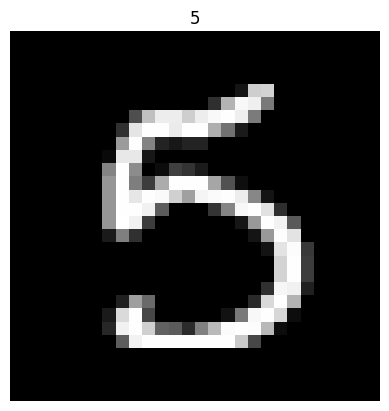

In [10]:
plot_digit(X,y,1)

In [ ]:
for i in [1, 5, 2000, 2001]:
  plot_digit(X,y,i)

## Feature Engineering

In [69]:
# intensity
def cal_intensity(data):
  return sum(data)/data.shape[0]

# symmetry
def cal_symmetry(data):
  total = 0
  for i in range(1, data.shape[0], 28):
    for j in range(0, 14):
      total += np.abs(data[i+j] - data[i+27-j])
  return total/(data.shape[0]/2)

In [85]:
for index, row in X.iterrows():
  temp = row

In [72]:
new_data = []

for index, row in X.iterrows():
  new_data.append(
      {'intensity': cal_intensity(row),
       'symmetry': cal_symmetry(row)}
  )

X_eng = pd.DataFrame(new_data)

### Visualization

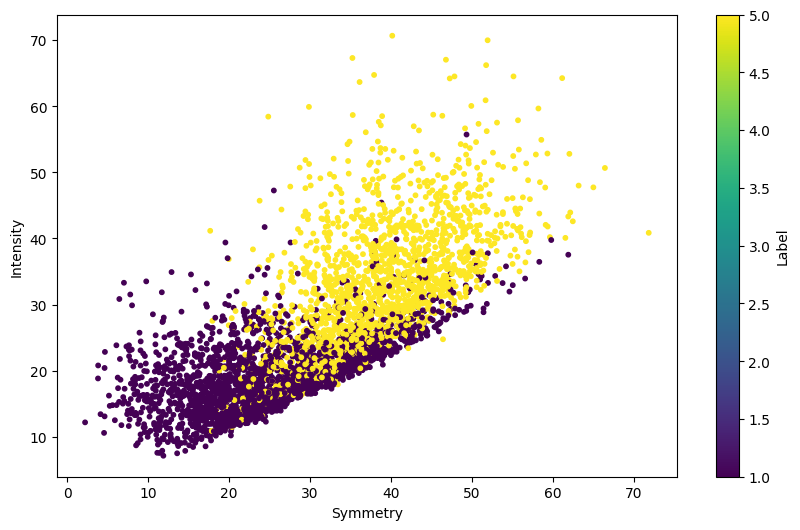

In [73]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_eng['symmetry'], X_eng['intensity'], c=y.astype('category'), s=10)

# Set labels and title
plt.xlabel('Symmetry')
plt.ylabel('Intensity')

# Add a color bar
plt.colorbar(scatter, label='Label')

# Show the plot
plt.show()

In [167]:
temp = X_eng.loc[1]

In [198]:
y

,0
0,5
1,5
2,5
3,5
4,5
...,...
3999,1
4000,5
4001,5
4002,1


## Regression using own own Gradient Descent

In [74]:
X_eng.iloc[1]

,1
intensity,31.811224
symmetry,26.505102


In [ ]:
# @title Hiding

def linear_model(w,b,X):
  return sum(w*X) + b

def J(w,b, X, y):
  err = 0
  for i in range(y.shape[0]):
    y_hat = linear_model(w,b, X.iloc[i])
    err  += (y_hat - y[i])**2
  return err/y.shape[0]

def dJ(w, b, X, y):
  dw = np.zeros(X.shape[1])
  db = 0
  for i in range(y.shape[0]):
    dw += (linear_model(w,b,X.iloc[i])-y[i])*X.iloc[i].to_numpy()
    db += (linear_model(w,b,X.iloc[i])-y[i])
  return dw/y.shape[0], db/y.shape[0]

def gradient_descent(X, y, alpha = 0.001, T=100):
  w = np.zeros(X.shape[1])  # initialize w vector
  b = 0
  for t in range(T):
    err = J(w,b, X, y)
    dw, db = dJ(w,b,X, y)
    w = w - alpha*dw
    b = b - alpha*db
    print(f"Iteration: {t}, Error = {err}, w = {w}, b = {b}.")
  return w, b

w, b = gradient_descent(X_eng, y)

In [95]:
# Testing
index = 3
print(y[index])
print(linear_model(w,b,X_eng.iloc[index]))

5
4.363466296991674


## Logistic Regression with Scikit-learn

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_eng, y)

LogisticRegression()

In [77]:
y_pred = model.predict(X_eng)

In [78]:
y_pred[0:10]

array([5, 5, 5, 5, 5, 5, 5, 1, 1, 1])

In [79]:
y.head(10)

,0
0,5
1,5
2,5
3,5
4,5
5,1
6,5
7,1
8,1
9,1


In [80]:
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83
